<a href="https://colab.research.google.com/github/sushgho/Msc-Project/blob/master/AI_fashion_MNIST_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage import transform

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import torchvision


from torch.utils.data import Dataset, DataLoader
#from vis_utils import *
import random;
import math;

In [ ]:
# define constants
NUM_EPOCHS = 50
BATCH_SIZE =32
LEARNING_RATE = 0.1
#LEARNING_RATE = 0.001
#LEARNING_RATE = 0.5
#LEARNING_RATE = 1
#LEARNING_RATE =10
num_classes = 10

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [ ]:
train_set = torchvision.datasets.FashionMNIST(root = ".", train = True ,
                                              download = True , transform = transforms.ToTensor())

test_set = torchvision.datasets.FashionMNIST(root = ".", train = False ,
                                             download = True , transform = transforms.ToTensor())

training_loader = torch.utils.data.DataLoader(train_set , batch_size = 32,
                                              shuffle = False)

test_loader = torch.utils.data.DataLoader(test_set , batch_size = 32,
                                          shuffle = False)

torch.manual_seed(0)

In [ ]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag','Ankle Boot')

torch.Size([32, 1, 28, 28])
torch.Size([32])


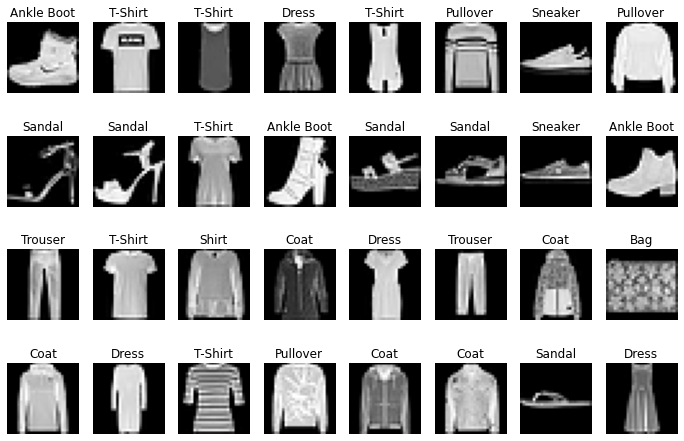

In [ ]:
for batch_1 in training_loader:
    batch = batch_1
    break
 
print(batch[0].shape) # as batch[0] contains the image pixels -> tensors
print(batch[1].shape) # batch[1] contains the labels -> tensors
 
plt.figure(figsize=(12, 8))
for i in range (batch[0].shape[0]):
    plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(classes[batch[1][i]])
    plt.savefig('fashion_mnist.png')
plt.show()

In [ ]:
class CNN(nn.Module):
    def __init__(self,num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc1 = nn.Linear(4*4*64, 256)
        self.fc2= nn.Linear(256,10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
'''class CNN(nn.Module):
    def __init__(self,num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(2))
        self.fc1 = nn.Linear(4*4*64, 256)
        self.fc2= nn.Linear(256,10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out'''

'class CNN(nn.Module):\n    def __init__(self,num_classes=10):\n        super(CNN, self).__init__()\n        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),\n            nn.Tanh(),\n            nn.MaxPool2d(2))\n        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),\n            nn.Tanh(),\n            nn.MaxPool2d(2))\n        self.fc1 = nn.Linear(4*4*64, 256)\n        self.fc2= nn.Linear(256,10)\n        \n    def forward(self, x):\n        out = self.layer1(x)\n        out = self.layer2(out)\n        out = out.view(out.size(0), -1)\n        out = self.fc1(out)\n        out = self.fc2(out)\n        return out'

In [ ]:
'''class CNN(nn.Module):
    def __init__(self,num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),
            nn.Sigmoid(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),
            nn.Sigmoid(),
            nn.MaxPool2d(2))
        self.fc1 = nn.Linear(4*4*64, 256)
        self.fc2= nn.Linear(256,10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out'''

'class CNN(nn.Module):\n    def __init__(self,num_classes=10):\n        super(CNN, self).__init__()\n        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),\n            nn.Sigmoid(),\n            nn.MaxPool2d(2))\n        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),\n            nn.Sigmoid(),\n            nn.MaxPool2d(2))\n        self.fc1 = nn.Linear(4*4*64, 256)\n        self.fc2= nn.Linear(256,10)\n        \n    def forward(self, x):\n        out = self.layer1(x)\n        out = self.layer2(out)\n        out = out.view(out.size(0), -1)\n        out = self.fc1(out)\n        out = self.fc2(out)\n        return out'

In [ ]:
'''class CNN(nn.Module):
    def __init__(self,num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),
            nn.ELU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),
            nn.ELU(),
            nn.MaxPool2d(2))
        self.fc1 = nn.Linear(4*4*64, 256)
        self.fc2= nn.Linear(256,10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out'''

'class CNN(nn.Module):\n    def __init__(self,num_classes=10):\n        super(CNN, self).__init__()\n        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),\n            nn.ELU(),\n            nn.MaxPool2d(2))\n        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),\n            nn.ELU(),\n            nn.MaxPool2d(2))\n        self.fc1 = nn.Linear(4*4*64, 256)\n        self.fc2= nn.Linear(256,10)\n        \n    def forward(self, x):\n        out = self.layer1(x)\n        out = self.layer2(out)\n        out = out.view(out.size(0), -1)\n        out = self.fc1(out)\n        out = self.fc2(out)\n        return out'

In [ ]:
net= CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE)


In [ ]:

# if GPU is available, then use GPU, else use CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device)

cpu


CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
# function to calculate accuracy
def calc_acc(loader):
    correct = 0
    total = 0
    net.eval()
    for data in loader:
        
        inputs, labels = data[0].to(device), data[1].to(device)
        #inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    return ((100*correct)/total)

In [ ]:
def train():
    epoch_loss = []
    train_acc = []
    test_acc = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0
        for i, data in enumerate(training_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
 
            # set parameter gradients to zero
            optimizer.zero_grad()
 
            # forward pass
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
 
            running_loss += loss.item()
 
        epoch_loss.append(running_loss/15000)
        train_acc.append(calc_acc(training_loader))
        test_acc.append(calc_acc(test_loader))
        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch+1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], running_loss/15000))
        
    return epoch_loss, train_acc, test_acc

In [ ]:
import time

In [ ]:
start = time.time()
epoch_loss, train_acc, test_acc = train()
end = time.time()
print('%0.2f minutes' %((end - start) / 60))

Epoch: 1 of 50, Train Acc: 86.343, Test Acc: 85.200, Loss: 0.068
Epoch: 2 of 50, Train Acc: 88.698, Test Acc: 87.890, Loss: 0.043
Epoch: 3 of 50, Train Acc: 89.817, Test Acc: 88.530, Loss: 0.037
Epoch: 4 of 50, Train Acc: 90.347, Test Acc: 88.930, Loss: 0.034
Epoch: 5 of 50, Train Acc: 91.092, Test Acc: 89.140, Loss: 0.031
Epoch: 6 of 50, Train Acc: 91.337, Test Acc: 88.900, Loss: 0.029
Epoch: 7 of 50, Train Acc: 91.743, Test Acc: 89.090, Loss: 0.027
Epoch: 8 of 50, Train Acc: 92.117, Test Acc: 89.330, Loss: 0.025
Epoch: 9 of 50, Train Acc: 92.320, Test Acc: 89.270, Loss: 0.024
Epoch: 10 of 50, Train Acc: 92.535, Test Acc: 89.280, Loss: 0.023
Epoch: 11 of 50, Train Acc: 92.887, Test Acc: 89.410, Loss: 0.022
Epoch: 12 of 50, Train Acc: 93.070, Test Acc: 89.140, Loss: 0.021
Epoch: 13 of 50, Train Acc: 92.262, Test Acc: 88.480, Loss: 0.020
Epoch: 14 of 50, Train Acc: 93.120, Test Acc: 89.350, Loss: 0.019
Epoch: 15 of 50, Train Acc: 93.320, Test Acc: 89.170, Loss: 0.018
Epoch: 16 of 50, Tr

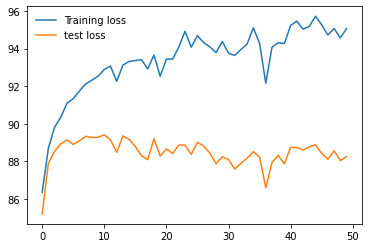

In [ ]:
plt.plot(train_acc, label = "Training loss")
plt.plot(test_acc, label = "test loss")
#plt.plot(epoch_loss,label="Epoch")
plt.legend(frameon = False)

In [ ]:
# Test the model
net.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
#torch.save(net.state_dict(), MODEL_STORE_PATH + 'conv_net_model.ckpt')

Test Accuracy of the model on the 10000 test images: 88.25 %


In [ ]:
#with dropout

In [ ]:
#(10 points) Now, add a dropout of 0.3 rate on the second fully connected layer. Whatis the impact of dropout on the performance? Provide the plot for training and testafter each epoch. What happens if you decrease or increase the dropout rate?

In [ ]:
'''class CNN(nn.Module):
    def __init__(self,num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc1 = nn.Linear(4*4*64, 256)
        self.drop = nn.Dropout2d(0.3)
        self.fc2= nn.Linear(256,10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        return out'''

'class CNN(nn.Module):\n    def __init__(self,num_classes=10):\n        super(CNN, self).__init__()\n        self.layer1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5),\n            nn.ReLU(),\n            nn.MaxPool2d(2))\n        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5),\n            nn.ReLU(),\n            nn.MaxPool2d(2))\n        self.fc1 = nn.Linear(4*4*64, 256)\n        self.drop = nn.Dropout2d(0.3)\n        self.fc2= nn.Linear(256,10)\n        \n    def forward(self, x):\n        out = self.layer1(x)\n        out = self.layer2(out)\n        out = out.view(out.size(0), -1)\n        out = self.fc1(out)\n        out = self.drop(out)\n        out = self.fc2(out)\n        return out'

In [ ]:
'''net= CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE)'''

'net= CNN()\ncriterion = nn.CrossEntropyLoss()\noptimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE)'

In [ ]:
'''# if GPU is available, then use GPU, else use CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device)'''

"# if GPU is available, then use GPU, else use CPU\ndevice = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')\nprint(device)\nnet.to(device)"

In [ ]:
'''# function to calculate accuracy
def calc_acc(loader):
    correct = 0
    total = 0
    net.eval()
    for data in loader:
        
        inputs, labels = data[0].to(device), data[1].to(device)
        #inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    return ((100*correct)/total)'''

'# function to calculate accuracy\ndef calc_acc(loader):\n    correct = 0\n    total = 0\n    net.eval()\n    for data in loader:\n        \n        inputs, labels = data[0].to(device), data[1].to(device)\n        #inputs, labels = inputs.to(device), labels.to(device)\n        outputs = net(inputs)\n        _, predicted = torch.max(outputs.data, 1)\n        total += labels.size(0)\n        correct += (predicted == labels).sum().item()\n        \n    return ((100*correct)/total)'

In [ ]:
'''def train():
    epoch_loss = []
    train_acc = []
    test_acc = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0
        for i, data in enumerate(training_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
 
            # set parameter gradients to zero
            optimizer.zero_grad()
 
            # forward pass
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
 
            running_loss += loss.item()
 
        epoch_loss.append(running_loss/15000)
        train_acc.append(calc_acc(training_loader))
        test_acc.append(calc_acc(test_loader))
        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch+1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], running_loss/15000))
        
    return epoch_loss, train_acc, test_acc'''

"def train():\n    epoch_loss = []\n    train_acc = []\n    test_acc = []\n    for epoch in range(NUM_EPOCHS):\n        running_loss = 0\n        for i, data in enumerate(training_loader, 0):\n            inputs, labels = data[0].to(device), data[1].to(device)\n \n            # set parameter gradients to zero\n            optimizer.zero_grad()\n \n            # forward pass\n            outputs = net(inputs)\n            loss = criterion(outputs, labels)\n            loss.backward()\n            optimizer.step()\n \n            running_loss += loss.item()\n \n        epoch_loss.append(running_loss/15000)\n        train_acc.append(calc_acc(training_loader))\n        test_acc.append(calc_acc(test_loader))\n        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'\n              % (epoch+1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], running_loss/15000))\n        \n    return epoch_loss, train_acc, test_acc"

In [ ]:
'''start = time.time()
epoch_loss, train_acc, test_acc = train()
end = time.time()
 
print('%0.2f minutes' %((end - start) / 60))'''

"start = time.time()\nepoch_loss, train_acc, test_acc = train()\nend = time.time()\n \nprint('%0.2f minutes' %((end - start) / 60))"

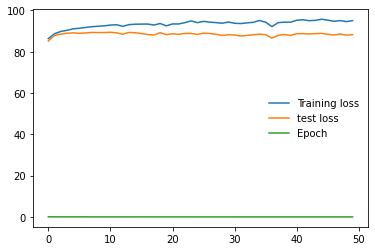

In [ ]:
plt.plot(train_acc, label = "Training loss")
plt.plot(test_acc, label = "test loss")

plt.plot(epoch_loss,label="Epoch")
plt.legend(frameon = False)

In [ ]:
'''# Test the model
net.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))'''

   

"# Test the model\nnet.eval()\nwith torch.no_grad():\n    correct = 0\n    total = 0\n    for images, labels in test_loader:\n        outputs = net(images)\n        _, predicted = torch.max(outputs.data, 1)\n        total += labels.size(0)\n        correct += (predicted == labels).sum().item()\n\n        print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))"